In [1]:
import numpy as np
import matplotlib.pyplot as plt
from acrobotics.util import get_default_axes3d, pose_x, plot_reference_frame
from acrobotics.recources.robots import Kuka
from acrobotics.recources.torch_model import torch
from acrobotics.path import FreeOrientationPt
from acrobotics.geometry import Shape, Collection
from acrobotics.planning import cart_to_joint_tool_first_cc
from acrobotics.planning import cart_to_joint_no_redundancy
from acrobotics.planning import get_shortest_path

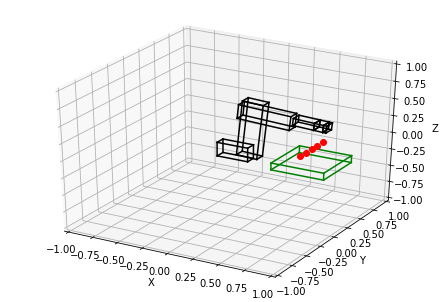

In [2]:
robot = Kuka()
#robot.set_tool(torch)

path = []
for s in np.linspace(0, 1, 5):
    xi = 0.8
    yi = s * 0.2 + (1-s) * (-0.2)
    zi = 0.2
    path.append(FreeOrientationPt([xi, yi, zi]))

floor_plane = Shape(0.5, 0.5, 0.1)
floor_plane_tf = pose_x(0.0, 0.8, 0.0, 0.0)

scene = Collection([floor_plane], [floor_plane_tf])
#scene = Collection([], [])

%matplotlib inline
fig, ax = get_default_axes3d()
q0 = [0, 1.5, 0, 0, 0, 0]
robot.plot(ax, q0, c='k')
scene.plot(ax, c='g')
for tp in path:
    tp.plot(ax)

In [3]:
# PLAN PATH
Q = cart_to_joint_no_redundancy(robot, path, scene)
#Q = cart_to_joint_tool_first_cc(robot, path, scene)
#Q = [[], []]
print([len(qi) for qi in Q])

Processing point 0/5
Processing point 1/5
Processing point 2/5
Processing point 3/5
Processing point 4/5
[3722, 3720, 3732, 3706, 3696]


In [4]:
res = get_shortest_path(Q, method='dijkstra')

In [5]:
qp_sol = res['path']

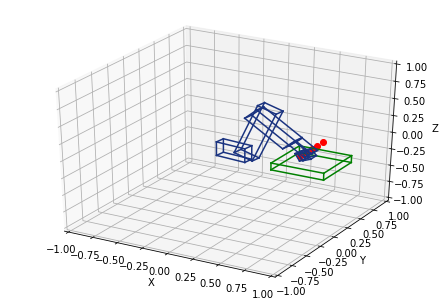

In [6]:
%matplotlib qt
fig2, ax2 = get_default_axes3d([-1, 1], [-1, 1], [-1, 1])
for pi in path: pi.plot(ax2)
scene.plot(ax2, c='g')
robot.animate_path(fig2, ax2, qp_sol)

In [7]:
for qi in qp_sol:
    print(qi)

[-0.11102966  1.26451182 -0.35941857  1.66855729  1.84654391  2.99703598]
[ 0.00709573  1.27565193 -0.36515984  1.78189492  1.91964722  3.11119175]
[ 0.12920213  1.27391779 -0.36762086  1.80181968  1.97156572  3.14016294]
[ 0.24882182  1.25415647 -0.34644097  1.81650126  2.02799559  3.09438252]
[ 0.36577517  1.21591878 -0.3331393   1.64100528  2.09401631  3.08899307]


In [8]:
%matplotlib qt
fig, ax = get_default_axes3d()
robot.plot(ax, qp_sol[2], c='k')
scene.plot(ax, c='g')
for tp in path:
    tp.plot(ax)

In [9]:
q1 = [-0.08307708, -0.61114407, 3.64637661,  0.77815741, -2.17606544,  2.35626125]

In [10]:
robot.is_in_collision(q1, scene)

True

In [11]:
%matplotlib qt
fig, ax = get_default_axes3d()
tfs = robot.fk_all_links(q1)
for link, tfi in zip(robot.links, tfs):
    link.shape.plot(ax, np.dot(tfi, link.tf_shape))